# SI370: Working with Time



In [164]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from pandas import Series
sns.set(style='white', color_codes=True, font_scale=1.3)


# make the Pandas tables a little more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [165]:
# read in stocks file
# convert the string that corresponds to date into datetime
# the first column (date) to be the index
df_stock = pd.read_csv('stocks.csv',parse_dates=True,index_col=0)
msft = df_stock.MSFT  # a series of MSFT stock

## The Basics (Time in Python)

In [166]:
# get the current time
now = datetime.now()

In [167]:
# the current time (at the time that I called datetime.now())
now

datetime.datetime(2017, 12, 4, 12, 37, 32, 986101)

In [92]:
# get current year, but also now.month
now.month

12

In [93]:
# create a datetime in the past 9/27/2015 at 12:00
somedate = datetime(2015,9,27,12,0,0)

In [94]:
somedate

datetime.datetime(2015, 9, 27, 12, 0)

In [95]:
# compare the times
delta = now - somedate

In [96]:
# first thing days, seconds, nanos  (days + seconds + nanos)
delta

datetime.timedelta(799, 1846, 618198)

In [97]:
# just converting to string
str(now)

'2017-12-04 12:30:46.618198'

## convert from strings to datetime objects

In [98]:
# read the string and give you back a datetime object
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [99]:
# MM/DD/YY
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

In [100]:
# for European style  DD/MM/YY
parse('12/6/2011',dayfirst=True) 

datetime.datetime(2011, 6, 12, 0, 0)

In [101]:
# weird formats
date = parse("4th of July, 2015")

In [102]:
# controlling pretty printing
date.strftime('%d')

# http://strftime.org/
# d, c, A

'04'

In [103]:
## WORKSHEET EXERCISE
dt = datetime(2011, 6, 2, 20, 0)

# get it to print "2nd of June, 2011 at 8 pm"
dt.strftime('%-dnd of %B, %Y at %-I %p')

'2nd of June, 2011 at 8 PM'

# Numpy Dates

In [104]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

In [105]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

In [106]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

# generating a series of time

In [107]:
dates = [datetime(2011,1,1),datetime(2011,1,2),
         datetime(2011,1,3),datetime(2011,1,4),
         datetime(2011,1,5)]

In [108]:
# dates now holds 5 datetime objects
dates

[datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 3, 0, 0),
 datetime.datetime(2011, 1, 4, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0)]

In [109]:
# create 5 random number --> np.random.randn(5)
# make the index the dates
ts = Series(np.random.randn(5),index=dates)
ts

2011-01-01    0.820559
2011-01-02    1.113758
2011-01-03   -0.452813
2011-01-04   -0.477961
2011-01-05    0.792044
dtype: float64

In [111]:
# give me the first value
ts[0]

0.82055880893820288

In [112]:
# get a range  from 2nd to 5th
ts[2:5]

2011-01-03   -0.452813
2011-01-04   -0.477961
2011-01-05    0.792044
dtype: float64

In [113]:
# give me the data for 1/3/2011
ts['2011-01-03']

-0.45281275136123533

In [114]:
# will also work
ts['1/3/2011']

-0.45281275136123533

In [115]:
# range
ts['1/1/2011':'1/3/2011']

2011-01-01    0.820559
2011-01-02    1.113758
2011-01-03   -0.452813
dtype: float64

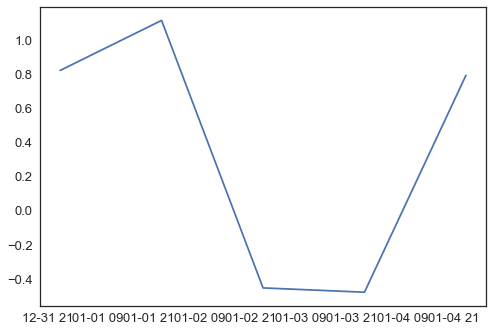

In [116]:
# show me the time series
plt.plot(ts)

## Math with Dates

In [117]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [118]:
# tell python we're working with days
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [119]:
# find the diff to the first day
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

# Making Ranges

In [120]:
# make a range between 7/3/2015 and 7/10/2015
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [121]:
# make a range starting at 7/3/2015
# for 8 days
pd.date_range('2015-07-03',periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [122]:
# make a range starting at 7/3/2015
# for 8 days but at hour granularity
pd.date_range('2015-07-03',periods=8,freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

# resampling data (dates)

In [123]:
# make the index the dates, create random data
ts = Series(np.random.randn(5),index=dates)  
ts

2015-07-03   -0.180823
2015-07-04   -1.459883
2015-07-06   -0.968300
2015-07-07   -1.653083
2015-07-08   -0.230994
dtype: float64

In [124]:
# resample by H --> H is hours
x = ts.resample('H').sum()
x.head()

2015-07-03 00:00:00   -0.180823
2015-07-03 01:00:00         NaN
2015-07-03 02:00:00         NaN
2015-07-03 03:00:00         NaN
2015-07-03 04:00:00         NaN
Freq: H, dtype: float64

In [125]:
# resample by 6H --> H is hours and 6 is multiplier
ts2 = ts.resample('6H').sum()
ts2.head()

2015-07-03 00:00:00   -0.180823
2015-07-03 06:00:00         NaN
2015-07-03 12:00:00         NaN
2015-07-03 18:00:00         NaN
2015-07-04 00:00:00   -1.459883
Freq: 6H, dtype: float64

In [126]:
# fill in missing data by pushing data forward
ts2 = ts2.fillna(method='ffill')  # bfill
ts2.head(10)

2015-07-03 00:00:00   -0.180823
2015-07-03 06:00:00   -0.180823
2015-07-03 12:00:00   -0.180823
2015-07-03 18:00:00   -0.180823
2015-07-04 00:00:00   -1.459883
2015-07-04 06:00:00   -1.459883
2015-07-04 12:00:00   -1.459883
2015-07-04 18:00:00   -1.459883
2015-07-05 00:00:00   -1.459883
2015-07-05 06:00:00   -1.459883
Freq: 6H, dtype: float64

In [40]:
# missing data in series, practical example
data = msft.iloc[:10]
data

Date
2011-01-03    24.542705
2011-01-04    24.639192
2011-01-05    24.560248
2011-01-06    25.279513
2011-01-07    25.086540
2011-01-10    24.753221
2011-01-11    24.656736
2011-01-12    25.042681
2011-01-13    24.726908
2011-01-14    24.823393
Name: MSFT, dtype: float64

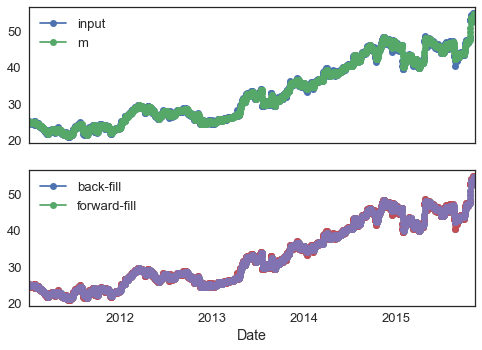

In [127]:
fig, ax = plt.subplots(2, sharex=True)

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# Shift in time

In [128]:
# date_range as a helper function
indx = pd.date_range('4/1/2012','6/1/2012')  # make me a date range, over 2 months
indx  # returns by day

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [129]:
# look at the bottom of object, see freq='...'  (tells you pattern)

In [130]:
# make a new time series using date_range
ts = Series(abs(np.random.randn(4)),
            index=pd.date_range('1/1/2000',periods=4,freq='M'))
# np.random.randn(4)  --> 4 random numbers
# abs(...)  made them all >= 0  (absolute value)
# index --> key for series
# date range --> start at 1/1/2000, give me 5 months

In [131]:
ts

2000-01-31    1.457830
2000-02-29    1.057761
2000-03-31    2.213114
2000-04-30    1.286934
Freq: M, dtype: float64

In [132]:
# shifted value (shift by 1)
ts.shift(1)

2000-01-31         NaN
2000-02-29    1.457830
2000-03-31    1.057761
2000-04-30    2.213114
Freq: M, dtype: float64

In [135]:
# shift backwards
ts.shift(-2)

2000-01-31    2.213114
2000-02-29    1.286934
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [136]:
# calculate ratio
ts / ts.shift(1)

2000-01-31         NaN
2000-02-29    0.725573
2000-03-31    2.092263
2000-04-30    0.581504
Freq: M, dtype: float64

In [137]:
# WORKSHEET EXERCISE
# calculate percent change 
(ts - ts.shift(-1))/ts

2000-01-31    0.274427
2000-02-29   -1.092263
2000-03-31    0.418496
2000-04-30         NaN
Freq: M, dtype: float64

In [138]:
# shift time
ts

2000-01-31    1.457830
2000-02-29    1.057761
2000-03-31    2.213114
2000-04-30    1.286934
Freq: M, dtype: float64

In [139]:
ts.tshift(1)   # tshift shifts the index

2000-02-29    1.457830
2000-03-31    1.057761
2000-04-30    2.213114
2000-05-31    1.286934
Freq: M, dtype: float64

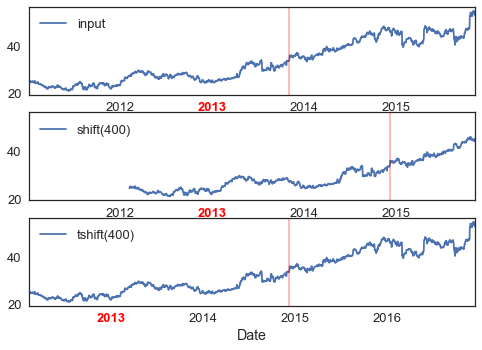

In [140]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
msft = msft.asfreq('D', method='pad')

msft.plot(ax=ax[0])
msft.shift(400).plot(ax=ax[1])
msft.tshift(400).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2013-11-05')
offset = pd.Timedelta(400, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(400)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(400)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

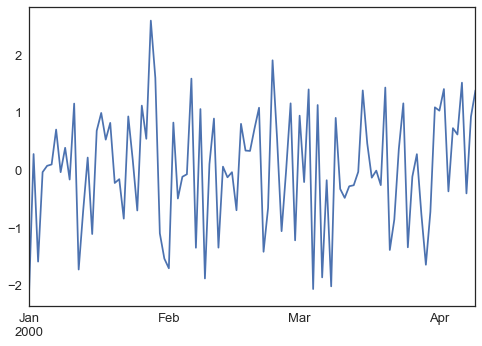

In [141]:
# make a larger time series
# give me 100 days staring at 1/1/2000
rng = pd.period_range('1/1/2000',periods=100,freq='D')  
ts = Series(np.random.randn(len(rng)),index=rng)
ts.plot()

In [142]:
# create a new time series with the mean as the monthly value
 

In [143]:
# find max value in that month
 

# working with data frames

In [144]:
df_stock.head(10)

AAPL       MSFT          SPX
Date                                         
2011-01-03  43.838201  24.542705  1271.869995
2011-01-04  44.066990  24.639192  1270.199951
2011-01-05  44.427464  24.560248  1276.560059
2011-01-06  44.391547  25.279513  1273.849976
2011-01-07  44.709458  25.086540  1271.500000
2011-01-10  45.551451  24.753221  1269.750000
2011-01-11  45.443707  24.656736  1274.479980
2011-01-12  45.813494  25.042681  1285.959961
2011-01-13  45.981095  24.726908  1283.760010
2011-01-14  46.353539  24.823393  1293.239990

In [145]:
# B is telling pandas that we are working with business days
df_stock = df_stock.to_period('B')  

In [146]:
df_stock[['AAPL','MSFT']]   # select apple and microsft


AAPL       MSFT
Date                             
2011-01-03   43.838201  24.542705
2011-01-04   44.066990  24.639192
2011-01-05   44.427464  24.560248
2011-01-06   44.391547  25.279513
2011-01-07   44.709458  25.086540
2011-01-10   45.551451  24.753221
2011-01-11   45.443707  24.656736
2011-01-12   45.813494  25.042681
2011-01-13   45.981095  24.726908
2011-01-14   46.353539  24.823393
2011-01-18   45.312024  25.139168
2011-01-19   45.071264  24.972509
2011-01-20   44.251882  24.867252
2011-01-21   43.459104  24.577792
2011-01-24   44.886369  24.893565
2011-01-25   45.411783  24.954967
2011-01-26   45.737675  25.244427
2011-01-27   45.652543  25.323371
2011-01-28   44.706798  24.340960
2011-01-31   45.135110  24.323417
2011-02-01   45.894634  24.551477
2011-02-02   45.800192  24.507620
2011-02-03   45.683139  24.253245
2011-02-04   46.090167  24.358504
2011-02-07   46.805794  24.735679
2011-02-08   47.247411  24.805851
2011-02-09   47.641138  24.533933
2011-02-10   47.159619  24.121673
2011-02-11   47.466888  23.902385
2011-02-14   47.776814  23.884841
...                ...        ...
2015-10-05  110.307825  46.630001
2015-10-06  110.835564  46.750000
2015-10-07  110.307825  46.799999
2015-10-08  109.033282  47.450001
2015-10-09  111.642117  47.110001
2015-10-12  111.124329  47.000000
2015-10-13  111.313522  46.889999
2015-10-14  109.740254  46.680000
2015-10-15  111.383223  47.009998
2015-10-16  110.566719  47.509998
2015-10-19  111.253780  47.619999
2015-10-20  113.285078  47.770000
2015-10-21  113.275126  47.200001
2015-10-22  115.007708  48.029999
2015-10-23  118.572451  52.869999
2015-10-26  114.788644  54.250000
2015-10-27  114.061760  53.689999
2015-10-28  118.761636  53.980000
2015-10-29  120.016268  53.360001
2015-10-30  118.990659  52.639999
2015-11-02  120.663499  53.240002
2015-11-03  122.047573  54.150002
2015-11-04  121.480003  54.400002
2015-11-05  120.919998  54.380001
2015-11-06  121.059998  54.919998
2015-11-09  120.570000  54.160000
2015-11-10  116.769997  53.509998
2015-11-11  116.110001  53.650002
2015-11-12  115.720001  53.320000
2015-11-13  112.339996  52.840000

[1226 rows x 2 columns]

In [149]:
# Resampling two ways - resample() is an aggregation
# asfreq() is selection
print('On 12/30/2011, msft was at:', msft['2011-12-30'])


On 12/30/2011, msft was at: 23.375811


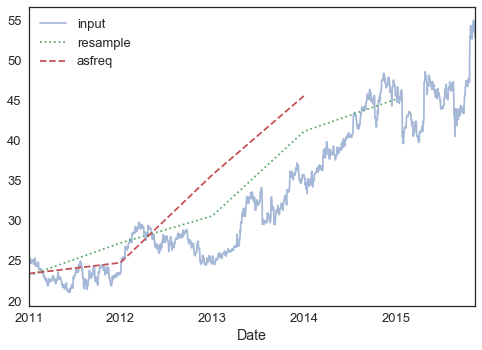

In [152]:
msft.plot(alpha=0.5, style='-')
msft.resample('BA').mean().plot(style=':')  
msft.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [158]:
# rolling data (mean over time)


In [159]:
data = pd.DataFrame({'input': msft
                    })
data['m'] = data.rolling(window=5).mean()

#data['m2'] = data.rolling(window=5).std()
data[500:900]

input          m
Date                            
2012-05-17  27.114457  27.601071
2012-05-18  26.703909  27.293274
2012-05-19  26.703909  27.072490
2012-05-20  26.703909  26.900972
2012-05-21  27.141827  26.873602
2012-05-22  27.150951  26.880901
2012-05-23  26.557936  26.851706
2012-05-24  26.521442  26.815213
2012-05-25  26.512319  26.776895
2012-05-26  26.512319  26.650993
2012-05-27  26.512319  26.523267
2012-05-28  26.512319  26.514144
2012-05-29  26.968484  26.603552
2012-05-30  26.767772  26.654643
2012-05-31  26.630923  26.678363
2012-06-01  25.955799  26.567059
2012-06-02  25.955799  26.455755
2012-06-03  25.955799  26.253218
2012-06-04  26.047030  26.109070
2012-06-05  26.010538  25.984993
2012-06-06  26.776896  26.149212
2012-06-07  26.667415  26.291536
2012-06-08  27.050594  26.510495
2012-06-09  27.050594  26.711207
2012-06-10  27.050594  26.919219
2012-06-11  26.366346  26.837109
2012-06-12  26.722156  26.848057
2012-06-13  26.576182  26.753174
2012-06-14  26.767772  26.696610
2012-06-15  27.388157  26.764123
...               ...        ...
2013-05-22  32.538013  32.769285
2013-05-23  32.105553  32.633906
2013-05-24  32.218368  32.521091
2013-05-25  32.218368  32.368789
2013-05-26  32.218368  32.259734
2013-05-27  32.218368  32.195805
2013-05-28  32.923468  32.359388
2013-05-29  32.791850  32.474084
2013-05-30  32.932867  32.616984
2013-05-31  32.810653  32.735441
2013-06-01  32.810653  32.853898
2013-06-02  32.810653  32.831335
2013-06-03  33.459343  32.964834
2013-06-04  32.895265  32.957313
2013-06-05  32.697834  32.934750
2013-06-06  32.867058  32.946031
2013-06-07  33.534552  33.090810
2013-06-08  33.534552  33.105852
2013-06-09  33.534552  33.233710
2013-06-10  33.346528  33.363448
2013-06-11  32.754243  33.340885
2013-06-12  32.904665  33.214908
2013-06-13  32.641428  33.036283
2013-06-14  32.340586  32.797490
2013-06-15  32.340586  32.596302
2013-06-16  32.340586  32.513570
2013-06-17  32.904665  32.513570
2013-06-18  32.885861  32.562457
2013-06-19  32.519210  32.598182
2013-06-20  31.485065  32.427077

[400 rows x 2 columns]

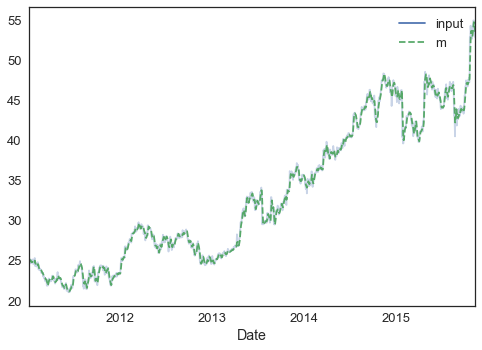

In [161]:
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)